# Convolutional Neural Networks (CNN)
Ya hemos hablado de **convolucion**. Las redes neuronales convolucionales usan la convolucion para la propagacion. Esto lo explicamos en esta clase.  Se me ocurren algunas ventajas.

* Es mucho mas reducida en el numero de parametros. No es "fully conncected" y los parametros es la longitud de los filtros que no es muy grande.

* Es mas intuitiva, por que los filtros sugieren lo que esta pasando en las capas internas.

* no se si hay mas. Esto por ahora.


En la segunda característica de la lista.
Las CNN ayudan a extraer pratrones de imágenes. Ya vimos cuando estudiamos convolución como la convolución (correlacion) ayuda a extraer patrones de imágenes.

Por ejemplo, si el filtro de convolución es


$$ \begin{pmatrix} 0 & 1 & 0 \\ 0 & 1 & 0 \\ 0 &1 & 0 \end{pmatrix} $$
Esta matrix se encarga de extraer (bajo convolucion) patrones verticales.

De la misma forma

$$ \begin{pmatrix} 0 & 0 & 0 \\ 1 & 1 & 1 \\ 0 &0 & 0 \end{pmatrix} $$
esta matriz se encarga de capturar patrones horizontales, o

$$ \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 &0 & 1 \end{pmatrix} $$
esta matriz extrae patrones diagonales Norte sur/este-oeste (NS-EO).

$$ \begin{pmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 &0 & 0 \end{pmatrix} $$
patrrones SN-EO

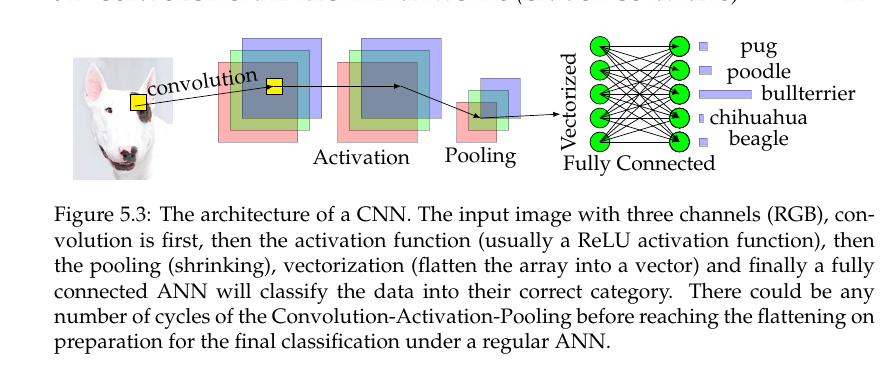

Veamos ejemplos practicos de como los patrones de las capas ocultas se pueden unir para formar
cosas mas grandes. O sea, lineas y circulos, etc para formar caras.



El articulo [convolutional deep belief networks](https://web.eecs.umich.edu/~honglak/icml09-ConvolutionalDeepBeliefNetworks.pdf)
explica como con segmentos y pedacitos de imagenes se forman caras.


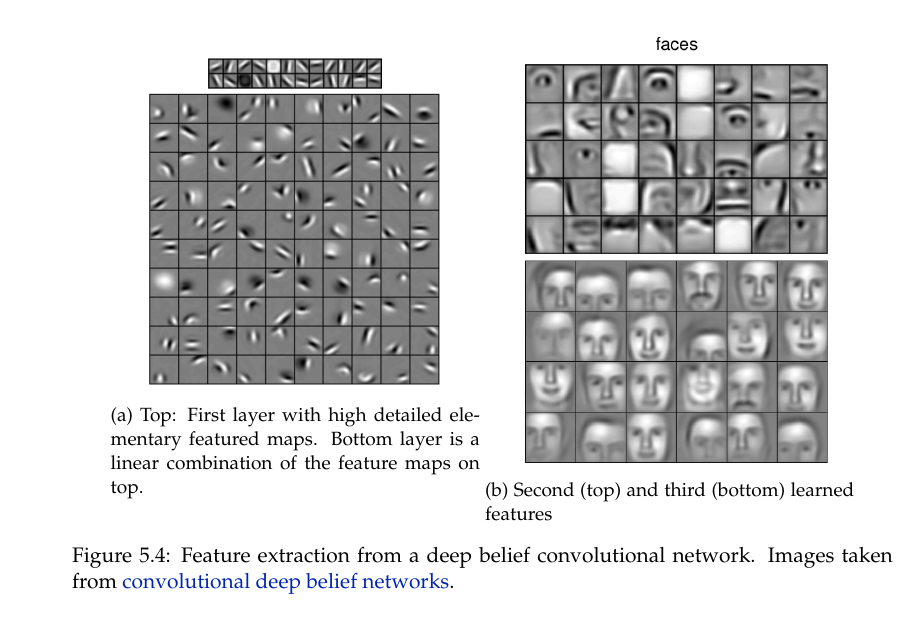

Otro ejemplo
[Stanford Convolutional Netowrks for Visual Recognition](http://cs231n.stanford.edu/)
Ilustra en el conjunto de CIFAR(10) como funciona la red convolucional con


Finalmente,
[Jason Brownlee](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)
es muy activo en ML. La pagina de el tiene una gran cantidad de ejemplos (en Keras) para ML. Es util.

Como muestra la Figura 5.3. La arquitectura de una CNN es

* Los datos de entrada
* Una convolucion con un filtro (hiperparametro). Inicialmente el filtro es aleatorio.
* Activacion (para quebrar la linealidad). Si se quiere lineal,
pues tambien se puede hacer regresion lineal con redes neuronales, la activacion es la identidad (no activacion)
* Pooling: Esto lo explicamos en esta clase. El objeto es reducir el tamano de los parametros y acelerar el proceso.

* Pueden haber varias secuencias entre convolucion-activacion-pooling

* Se vectorizan los nodos (en una sola columna)
* Se hace una **full** (densa)
* Se llama la activacion final de clasificacion. Por ejemplo la softmax.


## Capa convolucional:

Esta capa toma los datos de entrara (a la capa, de todo de el sistema, o de la capa inmediatamente anterior) y se hace la convolucion con un filtro. Los filtros convolutivos son inicializados con funciones aleatorias. Recuerde que ya
estudiamos convolucion en clases anteriores. Una grafica
nos ayuda a recordar esto.

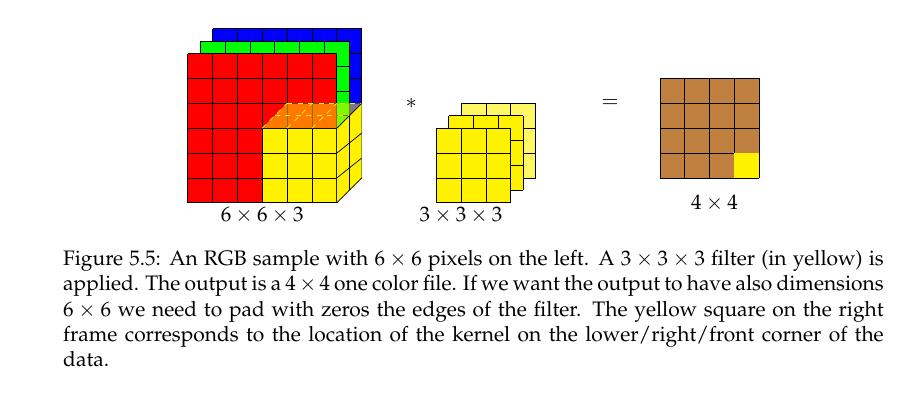

## Conteo de parametros entre dos capas convolucionales
Asuma la primera capa de dimensiones ```width x height x depth```.
Queremos aplicar una convolucion con un filtro de dimensiones
```cwidth x cheight x cdepth```. En general el la profundidad
(depth) del filtro es la misma que la de los datos para colapsar esta dimension. Ademas vamos a aplicar un nuevo numero de filtros de entrada para generar nuevos canales de salida. El numero de parametros que debe aprender el sistema, contando del "bias"
Asumimos \texttt{depth = cdepth}.

$$\text{# params= (cwidth x cheight x depth + 1) x filters} .$$


Ejemplo: Asumamos una imagen de 24 x 24 pixeles con 3 canales
y queremos aplicar un filtro de 3x3 y 15 nuevos canales (filtros que producen nodos).

Tenemos la siguiente informacion.

$$ \text{cwdith} = 3 $$
$$ \text{cheight} = 3 $$
$$ \text{depth} = 3 $$
$$ \text{fiters} = 15 $$
$$ \text{# parms = (3 x 3 x 3 + 1)x15 = 420.} $$
Si fuese fully connected tendria $(24 x 24)^2=331776$

Agregemosle otra capa convolucional con 20 filtros de 3x3, tenemos

$$ \text{cwdith} = 3 $$
$$ \text{cheight} = 3 $$
$$ \text{depth} = 15 $$ Ojoooo la profundidad es el numerdo de canales de entrada
$$ \text{fiters} = 20 $$
$$ \text{# parms = (3 x 3 x 15 + 1)x20 = 2720}. $$

Finalmente agregamos otra red convolucional con filtros de tamanho 3x3. Con 5 filtros de salida Esto produce

$$ \text{cwdith} = 3 $$
$$ \text{cheight} = 3 $$
$$ \text{depth} = 30 $$ Ojoooo la profundidad es el numerdo de canales de entrada
$$ \text{fiters} = 5 $$
$$ \text{# parms = (3 x 3 x 20 + 1)x5} = 905. $$

Ejemplo en python usando el "framework" Keras

In [ ]:
# ejemplo con keras
from keras import layers
from keras import models

model = models.Sequential()
# definimos el modelo convolucional con filtro (3x3)
# 3 canales de 24x24 pixeles de entrada y 15
model.add(layers.Conv2D(15, (3,3), input_shape=(24,24,3)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 15)        420       
                                                                 
Total params: 420 (1.64 KB)
Trainable params: 420 (1.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# agregememos la segunda capa
model.add(layers.Conv2D(20, (3,3)))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 15)        420       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 20)        2720      
                                                                 
Total params: 3140 (12.27 KB)
Trainable params: 3140 (12.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# tercera capa
model.add(layers.Conv2D(5, (3,3)))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 15)        420       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 20)        2720      
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 5)         905       
                                                                 
Total params: 4045 (15.80 KB)
Trainable params: 4045 (15.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Capa de activacion:
Basicamente, luego de la convolucion se activa la salida con alguna de las activaciones disponibles en Keras.

[conjunto de activaciones en keras](https://keras.io/api/layers/activations/#layer-activation-functions).

# Pooling layer.
El objetivo de la pooling layer.

* reducir el tamano de la red. Esta reduccion incrementa la velocidad de proceso, a la vez que reduce la memoria de uso.
* Sirve para evitar el "overfitting" (sobreajuste).
* Extrae los atributos mas importantes de la red neuronal.


El tamano despues de la pooling layer se calcula igual que en convolucion.


$$\text{size of pooling layer} = [ (n_x - k_x + p_x)/s_x] \times [(n_y - k_y + p_y)/s_y + 1] .$$

Si $s_x=s_y=1$, y $p_x=p_y=0$, tenemos $(n_x -k_x+1) x (n_y - k_y+1)$.
En general $k_x=k_y$, $p_x = p_y$, y $s_x = s_y$.

Hay dos tipos de pooling.


* maxpooling: Extrae el mayor de todos los que cobija el filtro en ese momento.
* average pooling: Promedia los elementos que cobija.

Veamos graficamente que pasa en ambos.


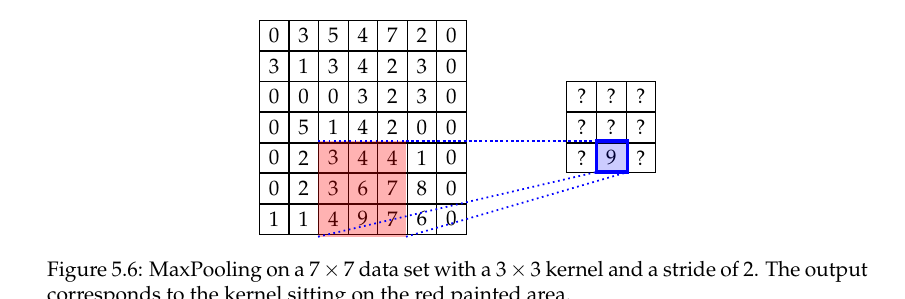

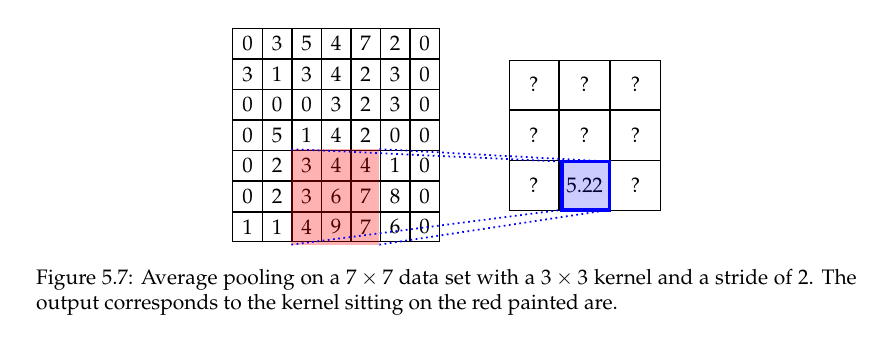